# Yet another HEALPix example (with ocean IFS-FESOM data)

Really good place with comprehensive information and a lot of axmaples is [easygems](https://easy.gems.dkrz.de/Processing/healpix/index.html) there will be nothing here that you don't find there (maybe a bit). This is just my attemps to provide another set of examples on how to work with HEALPix data.

In [3]:
import xarray as xr
import numpy as np
import gribscan
import intake
import eccodes
import healpy as hp
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

Open data

In [4]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [5]:
print(list(cat.IFS))

['IFS_9-FESOM_5-production', 'IFS_4.4-FESOM_5-cycle3', 'IFS_9-FESOM_5-cycle3', 'IFS_9-NEMO_25-cycle3', 'IFS_28-NEMO_25-cycle3', 'IFS_4.4-FESOM_5-cycle3-nofastdata', 'IFS_4.4-FESOM_5-cycle3-fastdata', 'IFS_grids']


In [6]:
print(list(cat.IFS['IFS_9-FESOM_5-production']))

['2D_hourly_healpix512', '2D_hourly_healpix512_2020s', '2D_hourly_healpix512_2030s', '2D_hourly_healpix512_2040s', '2D_daily_healpix512_ocean', '3D_hourly_healpix512', '3D_hourly_healpix512_snow', '3D_daily_healpix512_ocean', '2D_monthly_healpix512', '2D_monthly_healpix512_sst_ci_winds', '3D_monthly_healpix512', '3D_monthly_healpix512_snow', '2D_monthly_0.25deg', '2D_monthly_0.25deg_snow', '2D_monthly_0.25deg_sst_ci_winds', '3D_monthly_0.25deg']


In [126]:
ds = cat.IFS['IFS_9-FESOM_5-production']['2D_daily_healpix512_ocean'].to_dask()

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [127]:
ds

<xarray.Dataset>
Dimensions:        (time: 8990, value: 3145728)
Coordinates:
    lat            (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon            (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time           (time) datetime64[ns] 2020-01-21 2020-01-22 ... 2045-01-01
Dimensions without coordinates: value
Data variables:
    avg_mlotst125  (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siconc     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sisnthick  (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sithick    (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_siue       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sivn       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_sos        (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_tos        (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    avg_zos        (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

Those datasets have coordinates already, but let's imagine we don't have them.

In [14]:
data_example = ds['avg_tos'][-1,:]

In [15]:
data_example

<xarray.DataArray 'avg_tos' (value: 3145728)>
dask.array<getitem, shape=(3145728,), dtype=float64, chunksize=(3145728,), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
    time     datetime64[ns] 2045-01-01
Dimensions without coordinates: value
Attributes: (12/14)
    paramId:                    263101
    dataType:                   fc
    numberOfPoints:             3145728
    typeOfLevel:                oceanSurface
    stepUnits:                  1
    stepType:                   avg
    ...                         ...
    units:                      K
    name:                       Time-mean sea surface temperature
    cfVarName:                  avg_tos
    missingValue:               9999
    NV:                         0
    gridDefinitionDescription:  150

### Plot

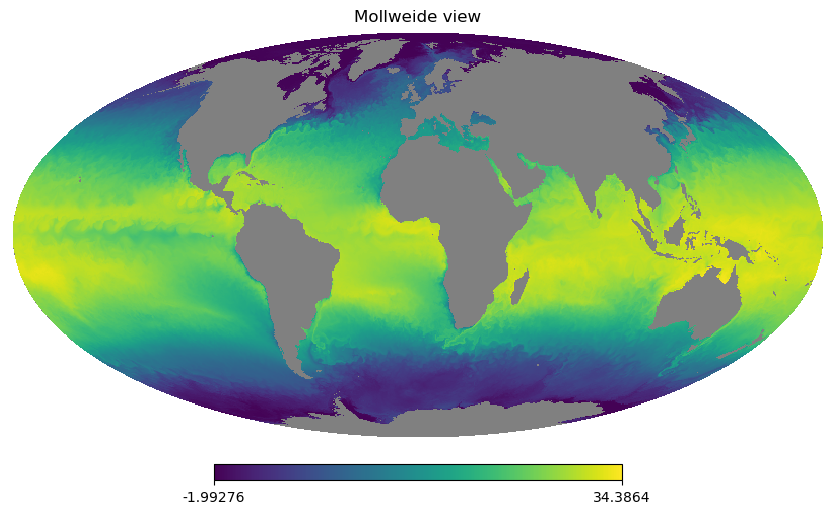

In [149]:
hp.mollview(data_example, flip="geo", nest=True)

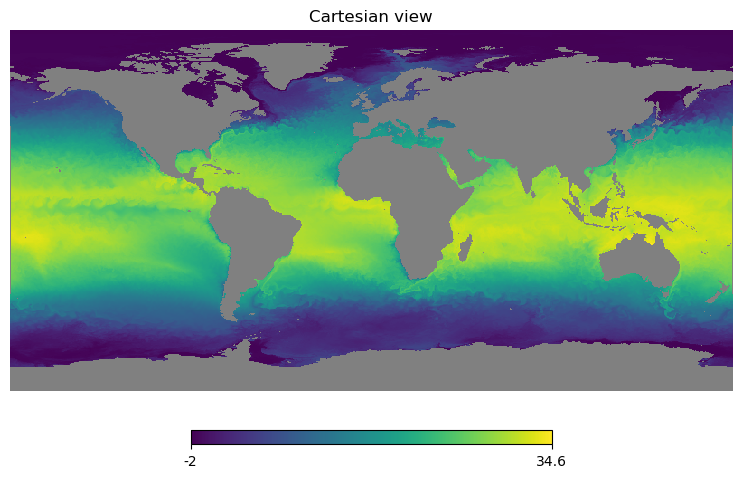

In [147]:
hp.cartview(data_example.values, flip="geo", nest=True)

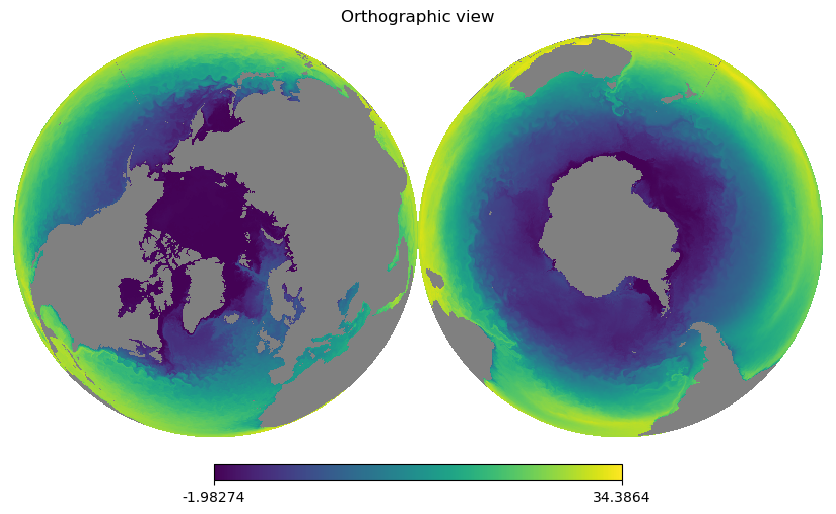

In [145]:
hp.orthview(data_example.values, flip="geo", nest=True, rot=[-30,90,])

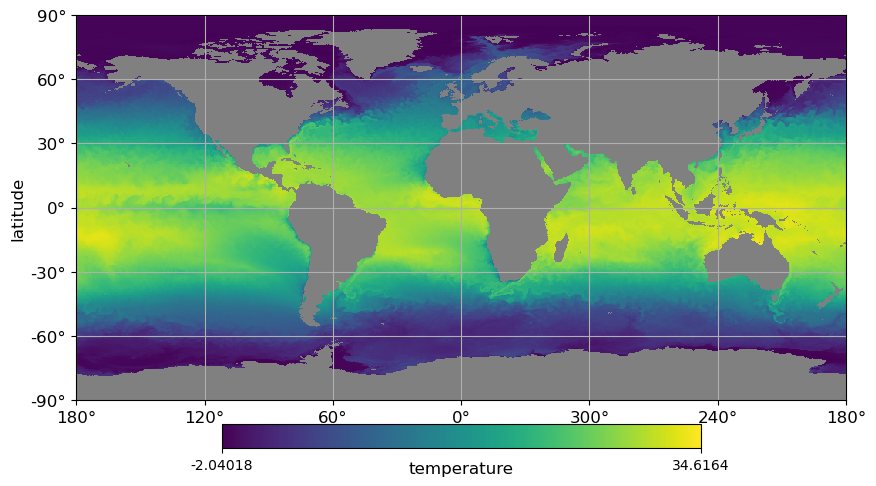

In [168]:
hp.projview(
    data_example.values,
    coord=["G"], 
    graticule=True, 
    graticule_labels=True, 
    flip="geo", 
    projection_type="cart",
    nest=True,
    unit="temperature",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="horizontal",
);

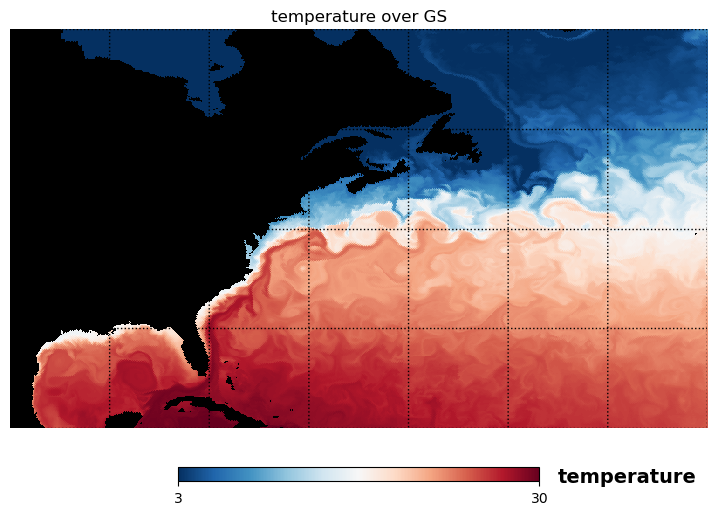

In [167]:
interpolated_data = hp.cartview(data_example.values,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='temperature over GS',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)

The `return_projected_map=True` returns interpolated data, that you can reuse:

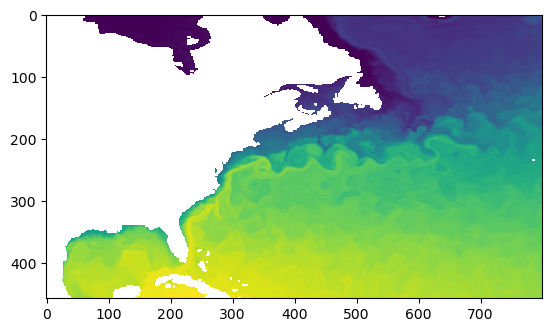

In [71]:
plt.imshow(np.flipud(interpolated_data))

Resue it for plotting in different projection:

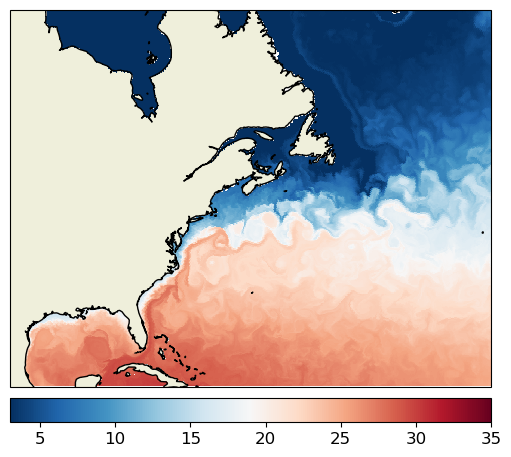

In [73]:
projection_ccrs = ccrs.PlateCarree()
fig, ax = plt.subplots(
                    1,
                    1,
                    subplot_kw=dict(projection=ccrs.Mercator()),
                    constrained_layout=True,
                    figsize=(5, 10),
                )
ax.set_extent([-100, -30, 20, 60], crs=ccrs.PlateCarree())
im1 = ax.imshow(np.flipud(interpolated_data), cmap=cm.RdBu_r,
                vmin=3, vmax=35,
                extent=(-100, -30, 20, 60),
                interpolation='nearest', 
               transform=ccrs.PlateCarree())
ax.coastlines()
cb = fig.colorbar(im1, orientation='horizontal', pad=0.01)
cb.ax.tick_params(labelsize=12)
ax.add_feature(cfeature.LAND)

### Get index of the closest point to coordinates

In [103]:
pix = hp.ang2pix(
        hp.npix2nside(len(data_example)), theta=-20, phi=20, nest=True, lonlat=True
    )

In [104]:
pix

1288995

In [105]:
ds.lon.values[pix]

339.9609375

In [106]:
ds.lat.values[pix]

20.026084741068615

CPU times: user 11min 10s, sys: 3min 49s, total: 14min 59s
Wall time: 28.8 s


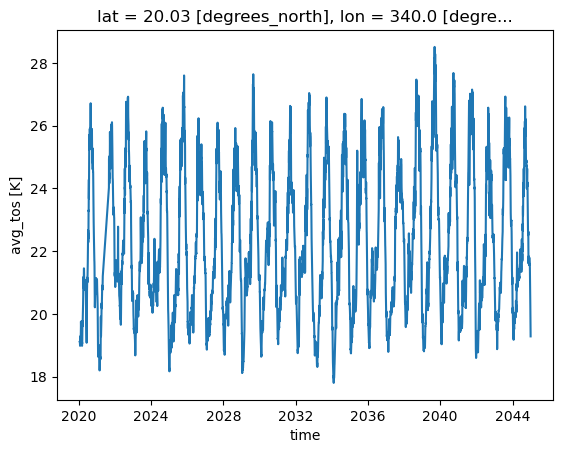

In [112]:
%%time
ds['avg_tos'][:,pix].plot()

Let's also plot the point

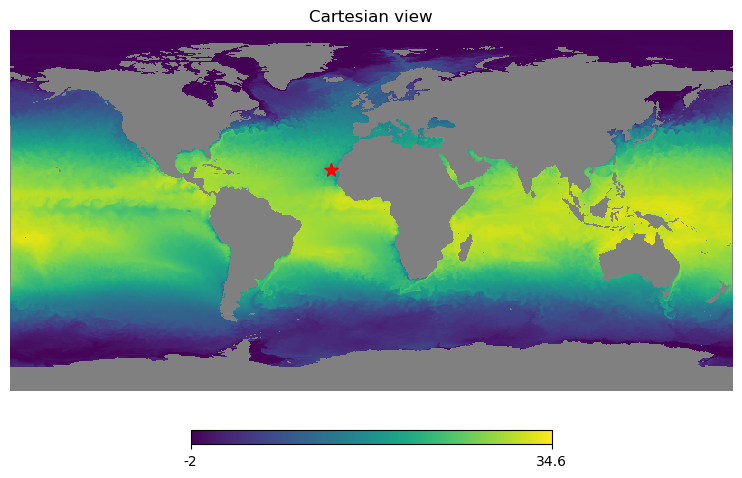

In [157]:
hp.cartview(data_example.values, flip="geo", nest=True)
hp.projscatter(theta=-20, phi=20, lonlat=True, s=100, c='r', marker='*')

### Get indexes of multiple closest points (simple neares neighbor)

In [133]:
lon = np.linspace(-180, 180, 360*4)
lat = np.linspace(-90, 90, 180*4)
lon2, lat2 = np.meshgrid(lon, lat)

In [135]:
pix = hp.ang2pix(
        hp.npix2nside(len(data_example)), theta=lon2, phi=lat2, nest=True, lonlat=True
    )

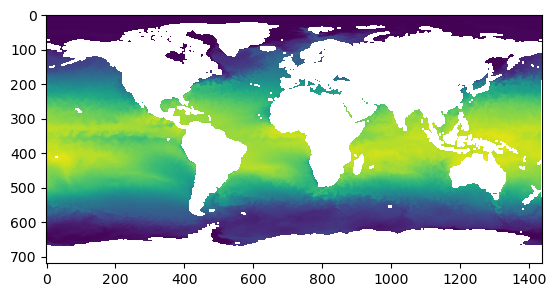

In [137]:
plt.imshow(np.flipud(data_example.values[pix]))

And yes, you can plot it with cartopy :)

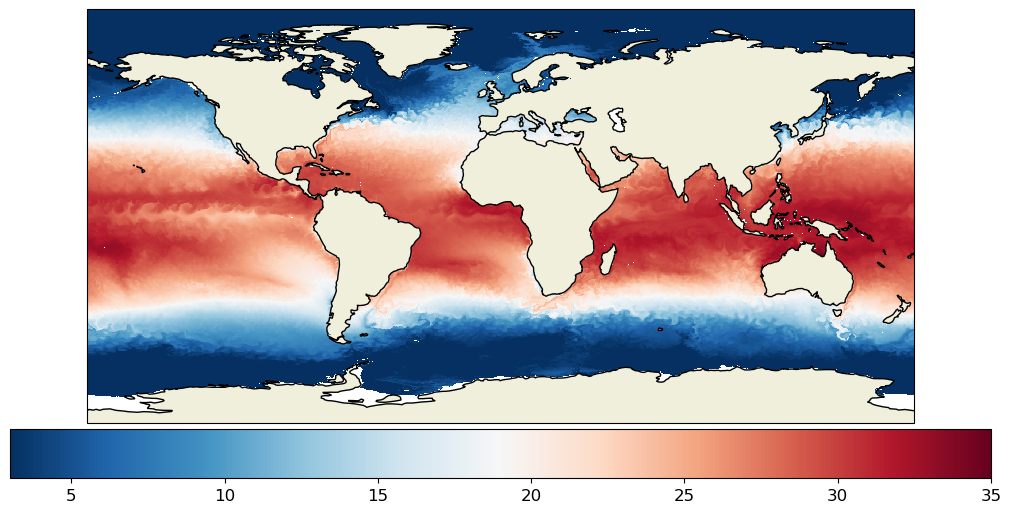

In [139]:
projection_ccrs = ccrs.PlateCarree()
fig, ax = plt.subplots(
                    1,
                    1,
                    subplot_kw=dict(projection=ccrs.PlateCarree()),
                    constrained_layout=True,
                    figsize=(10, 5),
                )
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
im1 = ax.imshow(np.flipud(data_example.values[pix]), cmap=cm.RdBu_r,
                vmin=3, vmax=35,
                extent=(-180, 180, -90, 90),
                interpolation='nearest', 
               transform=ccrs.PlateCarree())
ax.coastlines()
cb = fig.colorbar(im1, orientation='horizontal', pad=0.01)
cb.ax.tick_params(labelsize=12)
ax.add_feature(cfeature.LAND)

### Get coordinates of all healpix points

In [123]:
lons, lats = hp.pix2ang(
        hp.npix2nside(len(data_example)), np.arange(len(data_example)), nest=True, lonlat=True
    )

Here we just create indexes of HEALPix points from 0 to len(data_example) with `np.arange`.

In [131]:
lons

array([ 45.        ,  45.08789062,  44.91210938, ..., 315.08789062,
       314.91210938, 315.        ])

We have those values in the dataset already, so to double check: 

In [132]:
ds.lon.values

array([ 45.        ,  45.08789062,  44.91210938, ..., 315.08789062,
       314.91210938, 315.        ])

### Select region (a disc)

Define our point as vector:

In [207]:
vec = hp.ang2vec(theta=-70, phi=35, lonlat=True)

Selec all poitns that are within 5 degrees around this point:

In [208]:
ipix_disc = hp.query_disc(hp.npix2nside(len(data_example)), vec=vec, radius=np.radians(5), nest=True)

In [209]:
ipix_disc.shape

(5979,)

Put all values in this region to 10, just to visualise whaere the thing is located:

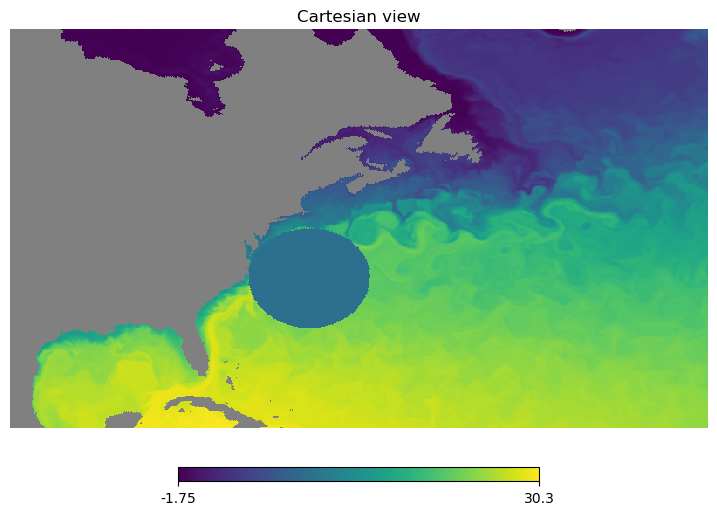

In [224]:
data_example_temp = data_example.copy()
data_example_temp[ipix_disc] = 10
hp.cartview(data_example_temp.values, 
            flip="geo", 
            nest=True, 
            lonra=[-100,-30],
            latra=[20, 60],)

In [215]:
data_example[ipix_disc].mean().values

array(22.66246892)

CPU times: user 12min, sys: 6min 40s, total: 18min 41s
Wall time: 54.5 s


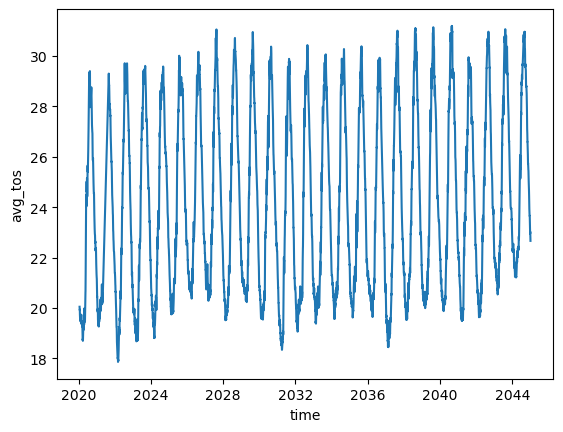

In [223]:
%%time
ds['avg_tos'][:,ipix_disc].mean(dim='value').plot()

### Let's do the same, byt for crazy shaped polygone

In [235]:
vec = hp.ang2vec(theta=[-72.45790808259244, -67.42720129935937, -64.1791029085233, -65.31367852896979, -69.04093141061784, -73.21360286609367, -73.41205731953379],
                phi=[36.74585787034209, 37.52766754793629, 35.44198302023801, 30.47283116562468, 27.82012749011463, 29.98815110240531, 33.86133521791246],
                lonlat=True)

In [236]:
vec

array([[ 0.24151603, -0.76403337,  0.59826667],
       [ 0.30442134, -0.73230504,  0.60914446],
       [ 0.35485163, -0.73336313,  0.5798783 ],
       [ 0.35996004, -0.78310166,  0.50712973],
       [ 0.3163568 , -0.82590069,  0.46669736],
       [ 0.2501419 , -0.82922139,  0.49982089],
       [ 0.23706486, -0.79582993,  0.55718487]])

In [237]:
ipix_poly = hp.query_polygon(hp.npix2nside(len(data_example)), vertices=vec, inclusive=False, nest=True)

In [238]:
ipix_poly.shape

(4221,)

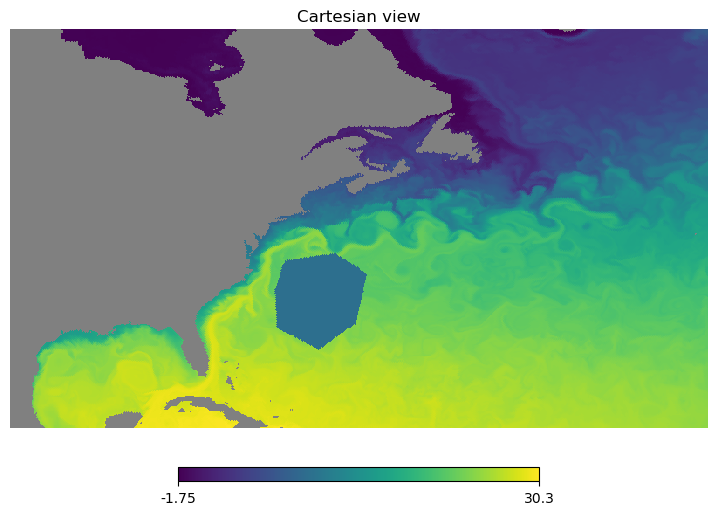

In [239]:
data_example_temp = data_example.copy()
data_example_temp[ipix_poly] = 10
hp.cartview(data_example_temp.values, 
            flip="geo", 
            nest=True, 
            lonra=[-100,-30],
            latra=[20, 60],)

In [241]:
data_example[ipix_poly].mean().values

array(23.26196012)

CPU times: user 12min 1s, sys: 7min, total: 19min 2s
Wall time: 56.9 s


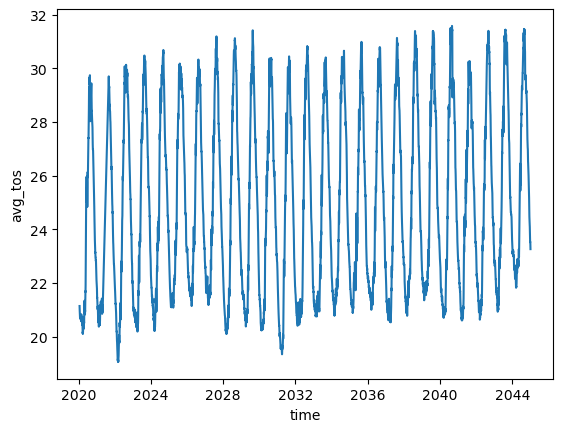

In [242]:
%%time
ds['avg_tos'][:,ipix_poly].mean(dim='value').plot()

### Upgrade or degrade resolution of a map

In [261]:
a = hp.ud_grade(data_example.values, nside_out=64, pess=False, order_in='NESTED', order_out='NESTED')

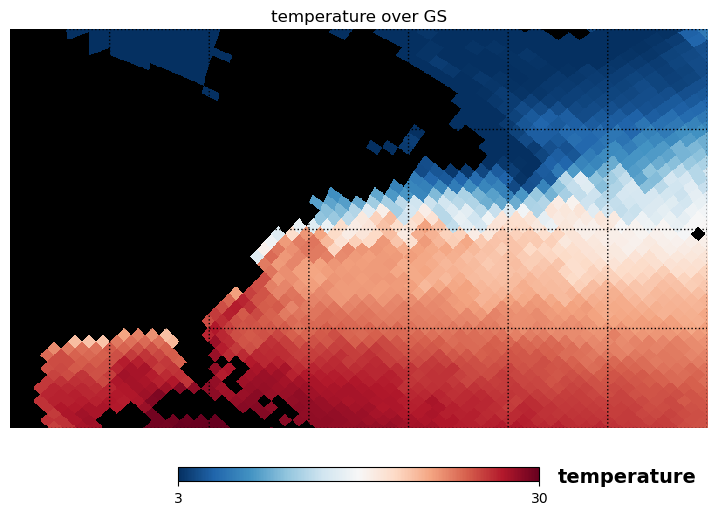

In [262]:
interpolated_data = hp.cartview(a,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='temperature over GS',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)